In [2]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns


In [10]:
test = "last_interaction"
cm = pd.read_csv(f"checkpoints/trans/{test}/metrics/confusion_matrix.csv")
cls_metrics = pd.read_csv(f"checkpoints/trans/{test}/metrics/class_metrics.csv")
cm = cm.drop(columns="Unnamed: 0")
cls_metrics = cls_metrics.drop(columns="Unnamed: 0")
cm = cm.round(2)
cls_metrics = cls_metrics.round(2)
cls_metrics
cm = cm.drop(18)
cm = cm.drop(columns="car/driveMode/2")


In [5]:
plt.rcParams.update({
    "text.usetex": True,
    "font.family": "serif",
    "font.serif": ["Computer Modern Roman"],
    #"font.size": 12,  # Adjust the font size for all elements
    "axes.labelsize": 15,  # Font size of axis labels
    "xtick.labelsize": 12,  # Font size of x-axis tick labels
    "ytick.labelsize": 12,  # Font size of y-axis tick labels
    "legend.fontsize": 14,  # Font size of legend
    "figure.titlesize": 20,  # Font size of figure title
    "axes.titlesize": 20
})

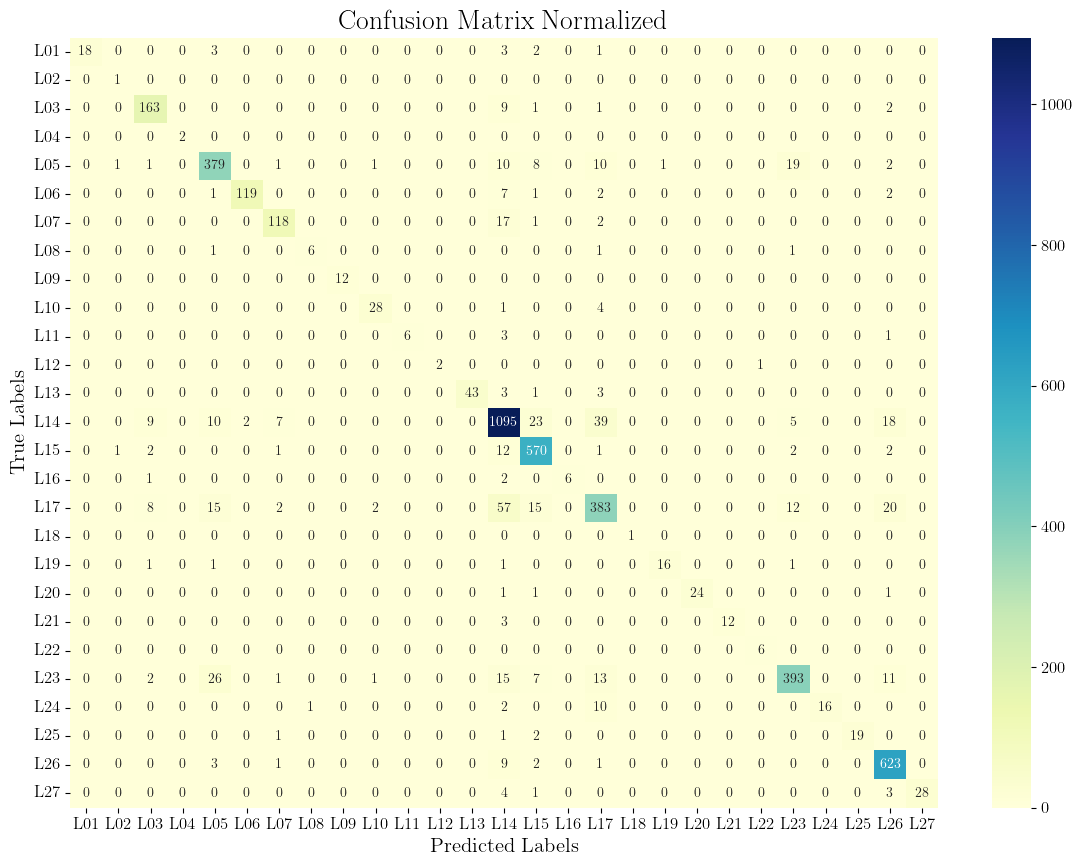

In [11]:
# cm = pd.DataFrame({
#     'Class A': [100, 5, 10],
#     'Class B': [2, 90, 8],
#     'Class C': [12, 7, 80]
# })



# Change name of labels
class_to_custom_label = {}
for i, key in enumerate(cm.columns):
    class_to_custom_label[key] = f"L{i + 1:02d}"
cm = cm.rename(columns=class_to_custom_label, index=class_to_custom_label)
class_labels = cm.columns.tolist()

# Plot the confusion matrix as a heatmap with custom labels on both axes
plt.figure(figsize=(14, 10))
#sns.heatmap(cm, annot=True, cmap='Blues', cmap=custom_cmap, cbar=False, yticklabels=class_labels)
sns.heatmap(cm, annot=True, cmap="YlGnBu", fmt='g', cbar=True, yticklabels=class_labels)
plt.yticks(rotation=0, ha='right')
plt.xlabel('Predicted Labels', )
plt.ylabel('True Labels')
plt.title('Confusion Matrix Normalized')
plt.show()

In [12]:
class_to_custom_label

{'clima/AC/ECO': 'L01',
 'phone/Connect/NewDevice': 'L02',
 'media/selectedSource/Bluetooth': 'L03',
 'car/Start/ParkAssistant': 'L04',
 'navi/Start/Favorite': 'L05',
 'media/selectedSource/CarPlay': 'L06',
 'media/selectedSource/Favorite': 'L07',
 'car/charismaLevel/Lift': 'L08',
 'car/charismaLevel/Abgesenkt': 'L09',
 'phone/Call/Favorite': 'L10',
 'car/ESS/on': 'L11',
 'car/driveMode/3': 'L12',
 'phone/Start/CarPlay': 'L13',
 'media/selectedSource/Radio': 'L14',
 'car/driveMode/3.0': 'L15',
 'phone/Start/AndroidAuto': 'L16',
 'phone/goTo/Favorite': 'L17',
 'clima/AC/on': 'L18',
 'clima/AC/off': 'L19',
 'car/driveMode/2.0': 'L20',
 'car/charismaLevel/Mittel': 'L21',
 'car/driveMode/0': 'L22',
 'navi/Start/Address': 'L23',
 'phone/Call/PersonX': 'L24',
 'car/charismaLevel/Tief': 'L25',
 'car/driveMode/0.0': 'L26',
 'car/driveMode/1.0': 'L27'}

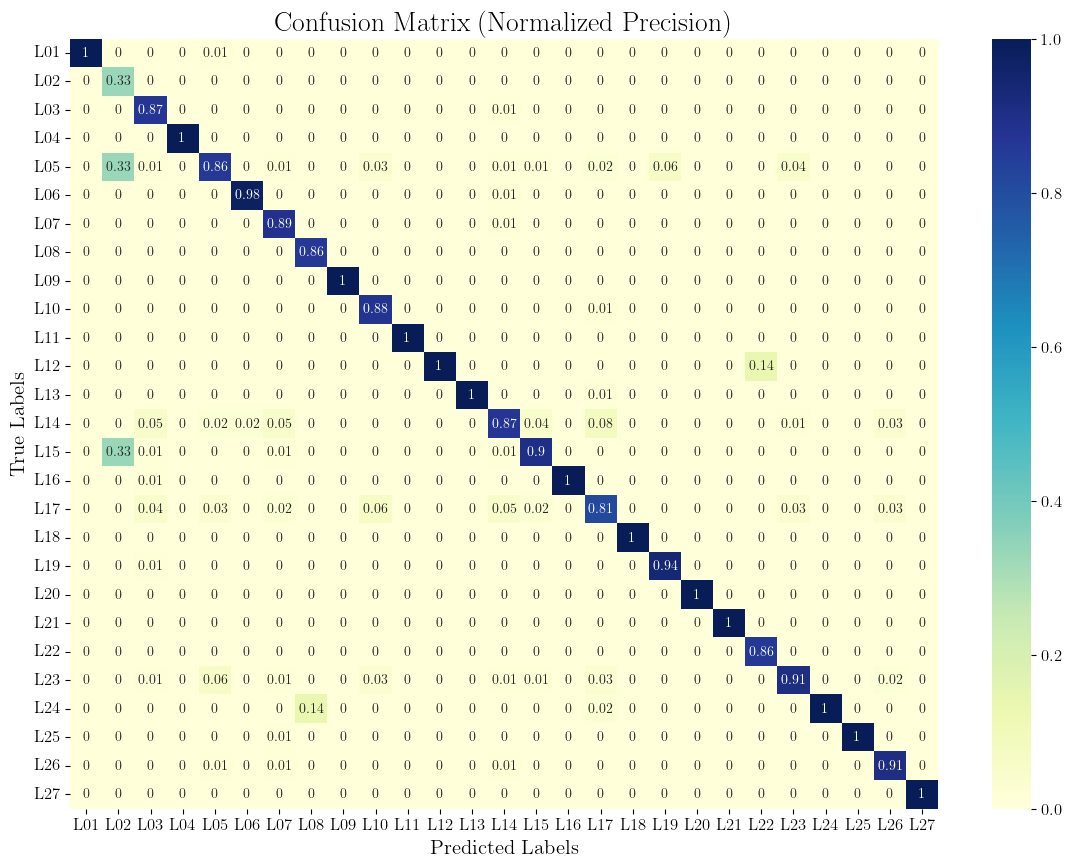

In [16]:
# Normalize along columns (FP) - Precision
cm_precision = cm.div(cm.sum(axis=0), axis=1).round(2)
cm_precision = cm_precision.fillna(0)
# Plot the confusion matrix as a heatmap with custom labels on both axes
plt.figure(figsize=(14, 10))
#sns.heatmap(cm, annot=True, cmap='Blues', cmap=custom_cmap, cbar=False, yticklabels=class_labels)
sns.heatmap(cm_precision, annot=True, cmap="YlGnBu", fmt='g', cbar=True, yticklabels=class_labels)
plt.yticks(rotation=0, ha='right')
plt.xlabel('Predicted Labels', )
plt.ylabel('True Labels')
plt.title('Confusion Matrix (Normalized Precision)')
plt.savefig("/Users/wannerje/Dropbox/Porsche/eth_report/Img/cm_Precision.pdf", format="pdf", bbox_inches="tight")
plt.show()

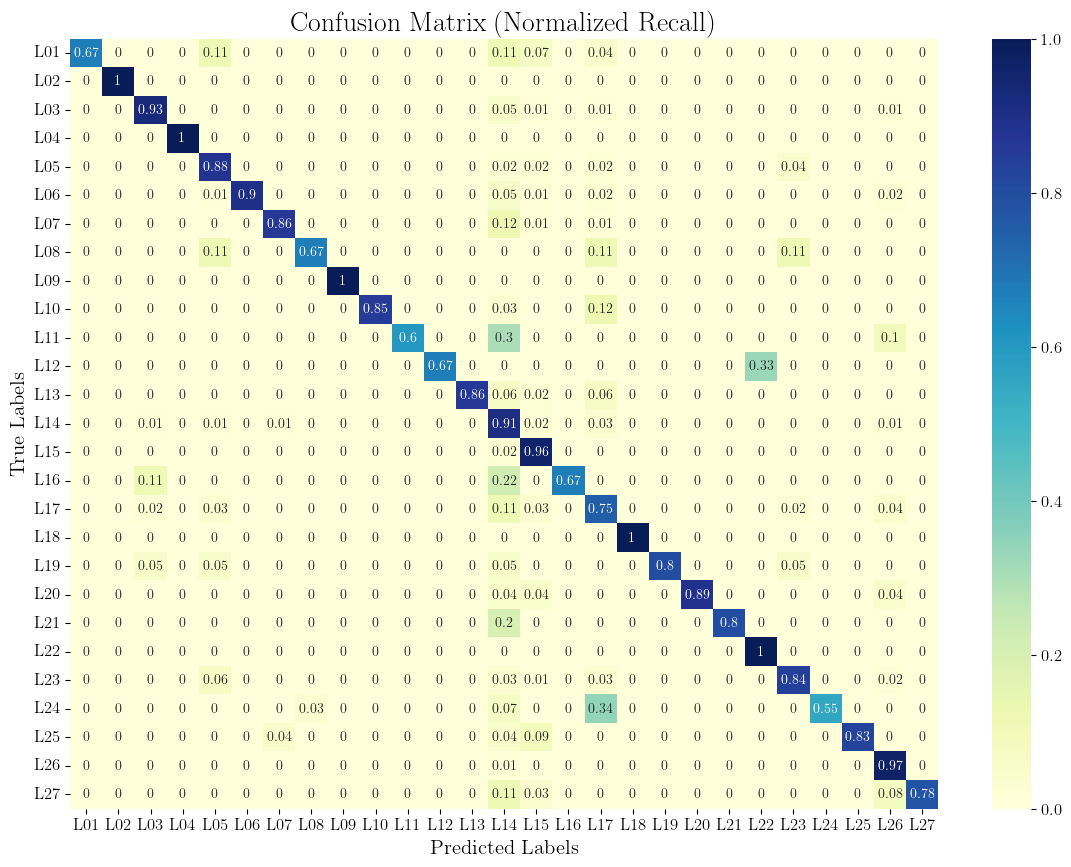

In [17]:
# Normalize along rows (FN) - Recall
cm_recall = cm.div(cm.sum(axis=1), axis=0).round(2)
cm_recall = cm_recall.fillna(0)
# Plot the confusion matrix as a heatmap with custom labels on both axes
plt.figure(figsize=(14, 10))
#sns.heatmap(cm, annot=True, cmap='Blues', cmap=custom_cmap, cbar=False, yticklabels=class_labels)
sns.heatmap(cm_recall, annot=True, cmap="YlGnBu", fmt='g', cbar=True, yticklabels=class_labels)
plt.yticks(rotation=0, ha='right')
plt.xlabel('Predicted Labels', )
plt.ylabel('True Labels')
plt.title('Confusion Matrix (Normalized Recall)')
plt.savefig("/Users/wannerje/Dropbox/Porsche/eth_report/Img/cm_Recall.pdf", format="pdf", bbox_inches="tight")

plt.show()

[0.   0.89 0.   0.5  0.58 0.6  0.79 0.74 0.   0.72 1.   0.63 0.5  0.
 0.4  0.33 0.   0.5  0.4  0.78 0.66 0.67 1.   1.   0.   0.   1.   0.  ]


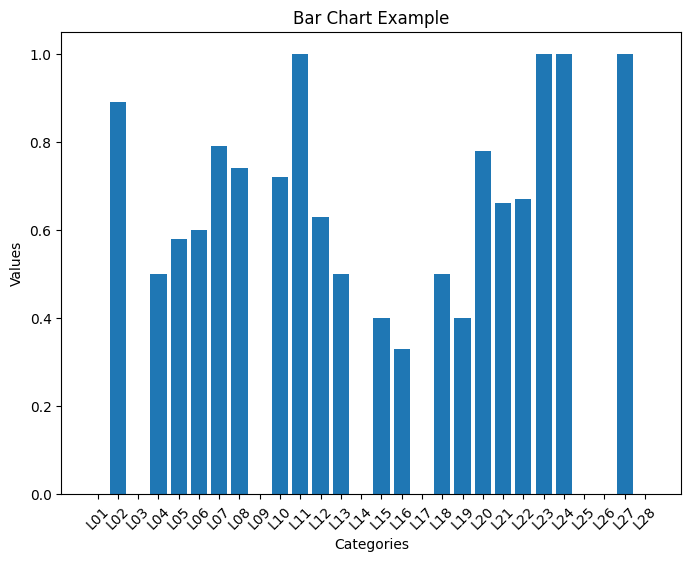

In [54]:

class_to_custom_label = {}
for i, key in enumerate(cls_metrics.columns):
    class_to_custom_label[key] = f"L{i + 1:02d}"
cls_metrics = cls_metrics.rename(columns=class_to_custom_label)
class_labels = cm.columns.tolist()

acc = cls_metrics.iloc[0,:]
print(acc.values)

# Create a bar chart using Matplotlib
plt.figure(figsize=(8, 6))
plt.bar(acc.index, acc.values)
plt.xlabel('Categories')
plt.ylabel('Values')
plt.title('Bar Chart Example')
plt.xticks(rotation=45)  # Rotate x-axis labels for better readability
plt.show()

# plt.figure(figsize=(8, 6))
# sns.barplot(x=acc.index, y=acc.values, palette="Blues")
# plt.xlabel('Categories')
# plt.ylabel('Values')
# plt.title('Bar Chart Example')
# plt.xticks(rotation=45)  # Rotate x-axis labels for better readability
# plt.show()

In [18]:
df_train = pd.read_csv("Dataset/data_all/train.csv")
df_test = pd.read_csv("Dataset/data_all/test.csv")

num_wind_tr = len(df_train.window_id.unique())
num_wind_te = len(df_test.window_id.unique())

print("train all: ", num_wind_tr)
print("test all: ", num_wind_te)
tot_labels = num_wind_tr + num_wind_te

car_ids = ["SEB880", "SEB882", "SEB883", "SEB888", "SEB889"]
df_train_all = df_train[df_train['car_id'].isin(car_ids)]
df_test_all = df_test[df_test['car_id'].isin(car_ids)]
print("train no 885: ", len(df_train_all.window_id.unique()))
print("test no 885: ", len(df_test_all.window_id.unique()))

df_train = df_train[df_train['car_id'].isin(["SEB885"])]
df_test = df_test[df_test['car_id'].isin(["SEB885"])]
print("train in 885: ", len(df_train.window_id.unique()))
print("test in 885: ", len(df_test.window_id.unique()))

tot_labels = num_wind_tr + num_wind_te
print(tot_labels)

train all:  4613
test all:  1978
train no 885:  4091
test no 885:  1754
train in 885:  522
test in 885:  224
6591


In [14]:
import pickle
with open('Dataset/data_all/param.pkl', 'rb') as f:
    _label_mapping = pickle.load(f)
    _class_w = pickle.load(f)
    _num_emb = pickle.load(f)
    _continuous_var = pickle.load(f)
    _static_var = pickle.load(f)
    _seq_len = pickle.load(f)

print(sum(_class_w * tot_labels))

print(_label_mapping)

tensor(6590.9995)
{'clima/AC/ECO': 0, 'phone/Connect/NewDevice': 1, 'media/selectedSource/Bluetooth': 2, 'car/Start/ParkAssistant': 3, 'navi/Start/Favorite': 4, 'media/selectedSource/CarPlay': 5, 'media/selectedSource/Favorite': 6, 'car/charismaLevel/Lift': 7, 'car/charismaLevel/Abgesenkt': 8, 'phone/Call/Favorite': 9, 'car/ESS/on': 10, 'car/driveMode/3': 11, 'phone/Start/CarPlay': 12, 'media/selectedSource/Radio': 13, 'car/driveMode/3.0': 14, 'phone/Start/AndroidAuto': 15, 'phone/goTo/Favorite': 16, 'clima/AC/on': 17, 'car/driveMode/2': 18, 'clima/AC/off': 19, 'car/driveMode/2.0': 20, 'car/charismaLevel/Mittel': 21, 'car/driveMode/0': 22, 'navi/Start/Address': 23, 'phone/Call/PersonX': 24, 'car/charismaLevel/Tief': 25, 'car/driveMode/0.0': 26, 'car/driveMode/1.0': 27}


In [21]:
a = [1,1,2]

(set(a))

{1, 2}